In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('Customers.csv')
df2 = pd.read_csv('Products.csv')
df3 = pd.read_csv('Transactions.csv')

In [3]:
df1.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
df1.shape

(200, 4)

In [5]:
df2.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
df2.shape

(100, 4)

In [7]:
df3.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [8]:
df3.shape

(1000, 7)

In [10]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [11]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


I have checked for any null value or datatype inconsistencies in the three given datasets and found out that there is not any null value and all the datatypes are accurate.

In [13]:
df1.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [15]:
df1['CustomerID'].nunique()

200

df1['CustomerID'].nunique() = 200 (total number of rows) means there is not any duplicate customerID

In [20]:
print(df1['Region'].unique())

['South America' 'Asia' 'North America' 'Europe']


In [22]:
df2['ProductID'].nunique()

100

df2['ProductID'].nunique() = 100 (total number of rows) means there is not any duplicate productID

In [24]:
print(df2['Category'].unique())

['Books' 'Electronics' 'Home Decor' 'Clothing']


In [25]:
df3['TransactionID'].nunique()

1000

df3['TransactionID'].nunique() = 1000 100 (total number of rows) means there is not any duplicate transactionID

### Merged dataset

In [3]:
merged_df = df3.merge(df1, on='CustomerID').merge(df2, on='ProductID')
print("Merged Dataset:")
print(merged_df.head())


Merged Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving B

In [30]:
merged_df.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')

In [32]:
merged_df[['Price_x', 'Price_y']]

,Price_x,Price_y
0,300.68,300.68
1,300.68,300.68
2,300.68,300.68
3,300.68,300.68
4,300.68,300.68
...,...,...
995,459.86,459.86
996,459.86,459.86
997,459.86,459.86
998,459.86,459.86


In [4]:
merged_df.drop('Price_y', axis = 1, inplace = True)

In [38]:
merged_df.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category'],
      dtype='object')

In [5]:
merged_df.rename(columns={'Price_x':'Price'},inplace= True)

In [40]:
merged_df.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category'],
      dtype='object')

In [6]:
# total revenue
merged_df['Revenue'] = merged_df['Quantity'] * merged_df['Price']
total_revenue = merged_df['Revenue'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 689995.56


In [7]:
# Top-selling products
top_products = merged_df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top-selling products:\n", top_products)

Top-selling products:
 ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64


In [8]:
# Most valuable customers
valuable_customers = merged_df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)
print("Most valuable customers:\n", valuable_customers)

Most valuable customers:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: Revenue, dtype: float64


In [9]:
# Monthly transations
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
revenue_trends = merged_df.groupby(merged_df['TransactionDate'].dt.to_period('M'))['Revenue'].sum()
print("Monthly Revenue Trends:\n", revenue_trends)

Monthly Revenue Trends:
 TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: Revenue, dtype: float64


In [10]:
# Customer Segmentation
customer_segments = merged_df.groupby('CustomerID').agg({
    'Revenue': 'sum',
    'TransactionID': 'count'
}).rename(columns={'TransactionID': 'TotalTransactions'})
customer_segments['Segment'] = pd.qcut(customer_segments['Revenue'], 4, labels=['Low', 'Medium', 'High', 'VIP'])

print(customer_segments.head())

            Revenue  TotalTransactions Segment
CustomerID                                    
C0001       3354.52                  5    High
C0002       1862.74                  4     Low
C0003       2725.38                  4  Medium
C0004       5354.88                  8     VIP
C0005       2034.24                  3     Low


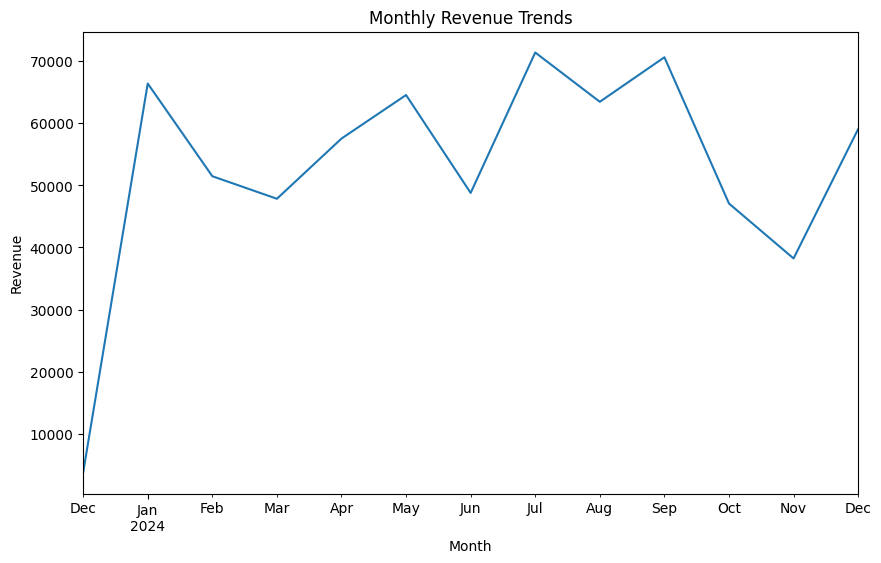

In [11]:
# Revenue Trends
plt.figure(figsize=(10, 6))
revenue_trends.plot(kind='line')
plt.title("Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

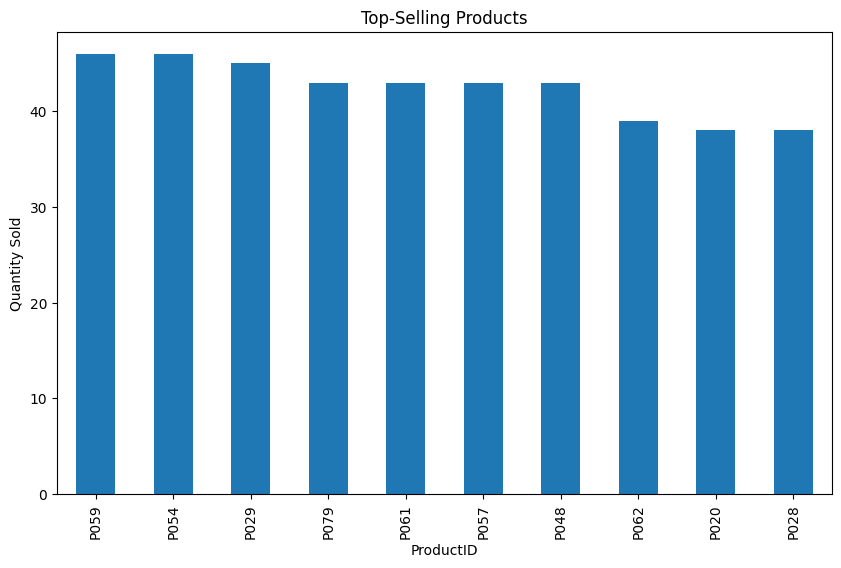

In [12]:
# Top-selling Products
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title("Top-Selling Products")
plt.xlabel("ProductID")
plt.ylabel("Quantity Sold")
plt.show()

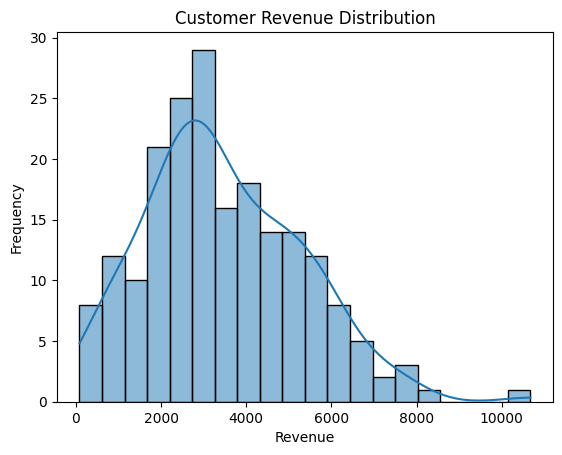

In [13]:
# Customer Segments
sns.histplot(customer_segments['Revenue'], bins=20, kde=True)
plt.title("Customer Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

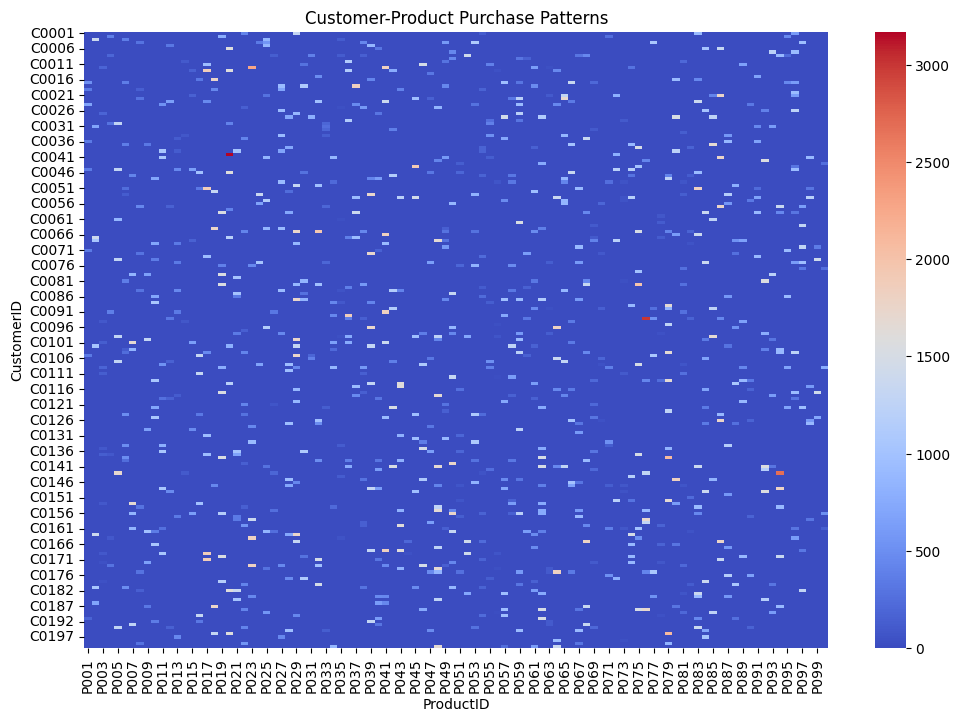

In [14]:
# Heatmap of Customer-Product Patterns
customer_product_matrix = merged_df.pivot_table(
    index='CustomerID', columns='ProductID', values='Revenue', aggfunc='sum', fill_value=0
)
plt.figure(figsize=(12, 8))
sns.heatmap(customer_product_matrix, cmap='coolwarm', cbar=True)
plt.title("Customer-Product Purchase Patterns")
plt.show()